In [65]:
%matplotlib widget

In [29]:
from pathlib import Path
import flammkuchen as fl
import numpy as np
import pandas as pd 
from fimpylab.core.lightsheet_experiment import LightsheetExperiment

import matplotlib.pyplot as plt

In [22]:
path = Path(r"\\funes\Shared\Hagar\tumelsc\group1\220919_f1")

In [100]:
directions = np.arange(0, 8) * np.pi * 2 / 8

single_trial = [6, 7, 0, 1, 2, 3, 4, 5, 6, 6, 5, 4, 3, 2, 1, 0, 7]

In [102]:
np.rad2deg(directions)

array([  0.,  45.,  90., 135., 180., 225., 270., 315.])

In [23]:
exp = LightsheetExperiment(path)

In [24]:
stim_log = exp.stimulus_log
stim_log

,bg_x,bg_y,bg_theta,bg_current_phase,t
0,0.00000,0.00000,0,0,0.012993
1,0.00000,0.00000,0,0,0.013992
2,0.00000,0.00000,0,0,0.024986
3,0.00000,0.00000,0,0,0.024986
4,0.00000,0.00000,0,0,0.028984
...,...,...,...,...,...
58984,-0.81636,0.11325,0,95,959.942175
58985,-0.62644,0.11325,0,95,959.961167
58986,-0.47655,0.11325,0,95,959.976156
58987,-0.38661,0.11325,0,95,959.985150


In [34]:
from motions.utilities import stim_vel_dir_dataframe, quantize_directions


In [13]:
np.unique(coherence)

array([-1. , -0.8, -0.3,  0. ,  0.3,  0.8,  1. ])

In [46]:
stimulus = {
    't': np.asarray(stim_log.t)[:-4],
    'theta': np.asarray(stim.theta),
}
fl.save(path / 'stimulus_files.h5', stimulus)

In [15]:
test = fl.load(path / 'stimulus_files.h5')

In [35]:
stim = stim_vel_dir_dataframe(exp)
bin_centres, dir_bins = quantize_directions(stim.theta)

In [47]:
suite2p_data = fl.load(path/ "suite2p" / "data_from_suite2p_cells.h5")
traces = suite2p_data['traces']

In [50]:
int_fact = 200
fs = 2
dt_imaging = 1 / fs
t_imaging_int = np.arange(traces.shape[1]*int_fact)*dt_imaging/int_fact

In [53]:
from scipy import signal
from scipy.interpolate import interp1d

In [51]:
t_imaging = np.arange(traces.shape[1])/fs
t_stim = np.asarray(stim_log.t)[:-4]
theta_full = np.asarray(stim.theta)

In [62]:
theta = interp1d(t_stim, theta_full, bounds_error=False, fill_value=0)(t_imaging_int)
theta_reg = signal.decimate(theta, int_fact, ftype="fir")

theta_reg = signal.resample(theta, np.shape(t_imaging)[0])

In [95]:
theta_test = theta[0:-1:200]

In [96]:
np.shape(theta_test)

(1920,)

In [99]:
stimulus = {
    'theta_full': theta_full,
    'theta': theta_test,
}
fl.save(path / 'stimulus_file.h5', stimulus)

In [77]:
check = fl.load(path / 'stimulus_file.5')
t_check = check['t

(22325, 1920)

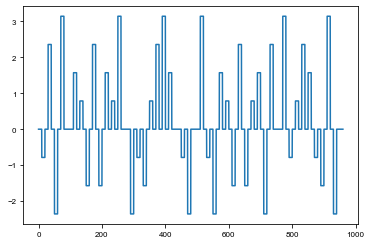

In [45]:
plt.plot(np.asarray(stim_log.t)[:-4], np.asarray(stim.theta))

In [97]:
fig = plt.figure()
plt.plot(theta_test)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [25]:
directions = np.arange(0, 8) * np.pi * 2 / 8

single_trial = [6, 7, 0, 1, 2, 3, 4, 5, 6, 6, 5, 4, 3, 2, 1, 0, 7]
direction_order = np.concatenate([np.asarray(single_trial)
                             for _ in range(8)])

In [27]:
directions

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714])

In [20]:
exp_test = LotrExperiment(path)

In [21]:
exp_test.fs

2